In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from scipy.interpolate import make_interp_spline

In [11]:
df = pd.read_csv('file_fixed.csv',sep=";")
df

,type,T,p,size,result
0,seq,73.128693,1,100000000,5761455
1,seq,73.146984,1,100000000,5761455
2,seq,72.915517,1,100000000,5761455
3,seq,72.558012,1,100000000,5761455
4,seq,72.524107,1,100000000,5761455
...,...,...,...,...,...
467,hybrid,3.965817,15,100000000,5761455
468,hybrid,3.984579,15,100000000,5761455
469,hybrid,4.259828,15,100000000,5761455
470,hybrid,4.362538,15,100000000,5761455


In [12]:
seq = df.loc[df['type'] == 'seq']
seq = seq.groupby(["type", "p"]).min()
T1 = seq['T']
print(T1)

type  p
seq   1    72.379665
Name: T, dtype: float64


In [13]:
df = df[df['type'] != "seq"]
df = df.groupby(["type", "p"], as_index=False).min()
df

,type,p,T,size,result
0,hybrid,2,42.762949,100000000,5761455
1,hybrid,3,15.715624,100000000,5761455
2,hybrid,4,11.711095,100000000,5761455
3,hybrid,5,9.685474,100000000,5761455
4,hybrid,6,8.195771,100000000,5761455
5,hybrid,7,7.406621,100000000,5761455
6,hybrid,8,6.438340,100000000,5761455
7,hybrid,9,5.886503,100000000,5761455
8,hybrid,10,5.322901,100000000,5761455
9,hybrid,11,5.090564,100000000,5761455


# Przyspieszenie
- S(p) = Tsek/T(p) = T(1)/T(p)
# Efektywność 
- E(p) = S(p)/p * 100%

In [14]:

df['speed_up'] = df.apply(lambda x: T1/x["T"], axis=1)
df['efficiency'] = df.apply(lambda x: (x["speed_up"]/x["p"])*100, axis=1)
df.to_csv('output.csv', index=False)
df


,type,p,T,size,result,speed_up,efficiency
0,hybrid,2,42.762949,100000000,5761455,1.692579,84.628945
1,hybrid,3,15.715624,100000000,5761455,4.605586,153.519548
2,hybrid,4,11.711095,100000000,5761455,6.180435,154.510883
3,hybrid,5,9.685474,100000000,5761455,7.473012,149.460243
4,hybrid,6,8.195771,100000000,5761455,8.831343,147.189050
5,hybrid,7,7.406621,100000000,5761455,9.772292,139.604175
6,hybrid,8,6.438340,100000000,5761455,11.241976,140.524702
7,hybrid,9,5.886503,100000000,5761455,12.295868,136.620758
8,hybrid,10,5.322901,100000000,5761455,13.597785,135.977853
9,hybrid,11,5.090564,100000000,5761455,14.218398,129.258164


In [15]:
def show_plots(type: str):
    data = df.loc[df["type"] == type]
    p = data["p"].tolist()
    show_plot("Czas wykonania", "p", "T(p)", p,  data["T"].to_list())
    show_plot("Przyspieszenie obliczeń", "p", "S(p)", p,  data["speed_up"].tolist())
    show_plot("Efektywność zrównoleglania", "p", "E(p)", p,  data["efficiency"].tolist())

def show_plot(title: str, x_label: str, y_label: str, x: list, y: list):
    x = np.array(x)
    y = np.array(y)
    X_Y_Spline = make_interp_spline(x, y)
 
    # Returns evenly spaced numbers
    # over a specified interval.
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    
    # Plotting the Graph
    plt.plot(X_, Y_, 1, 1)
    # plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()



### Analiza wydajności programów równoległych dal stałego rozmiaru zadania obliczeniowego

### OpneMP

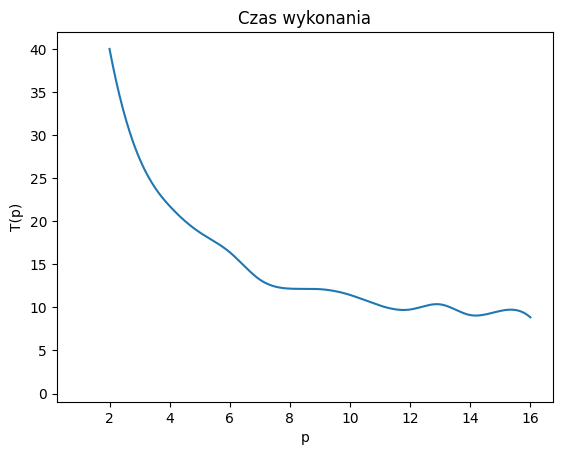

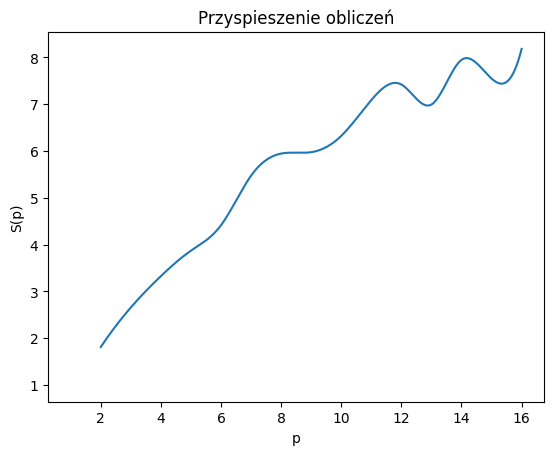

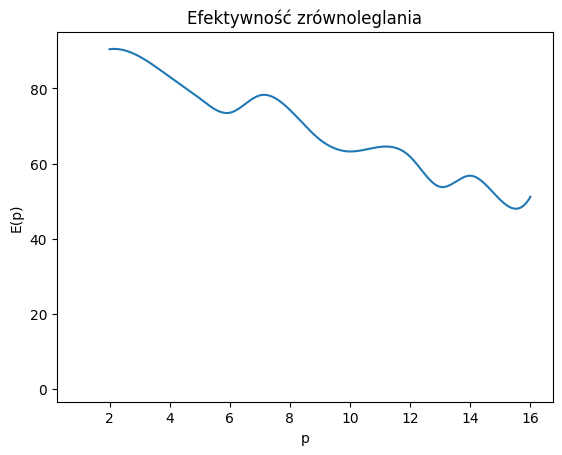

In [16]:
show_plots("openmp")

### MPI

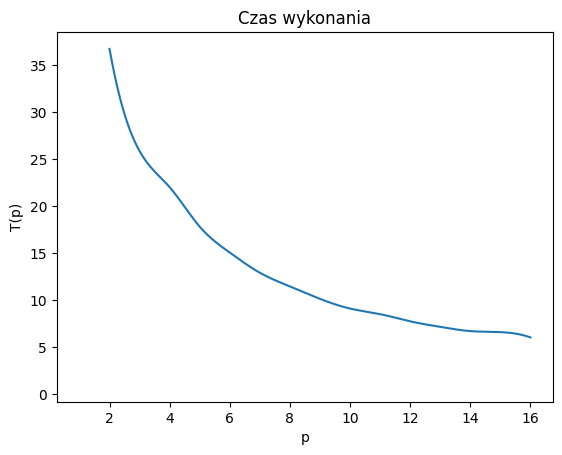

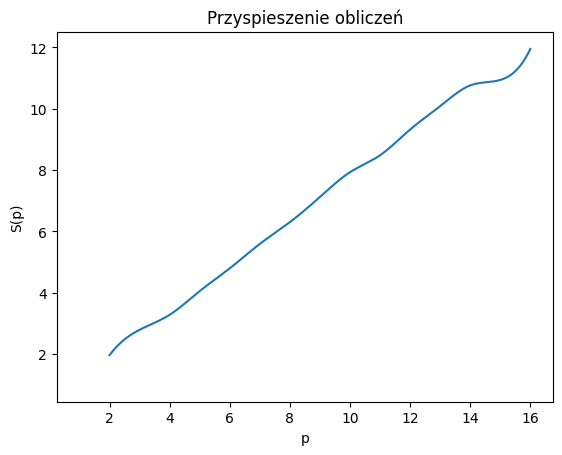

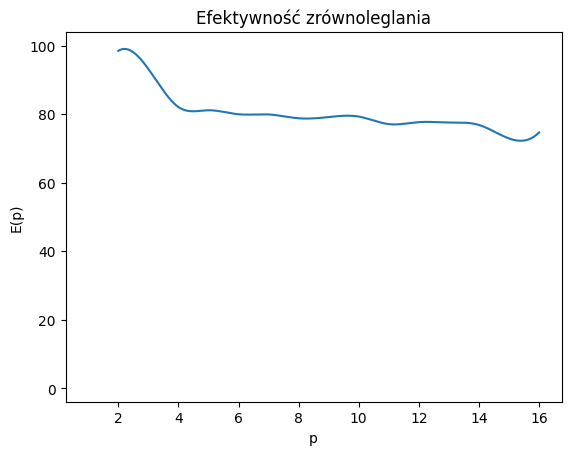

In [17]:
show_plots("mpi")

### MPI + OpenMP

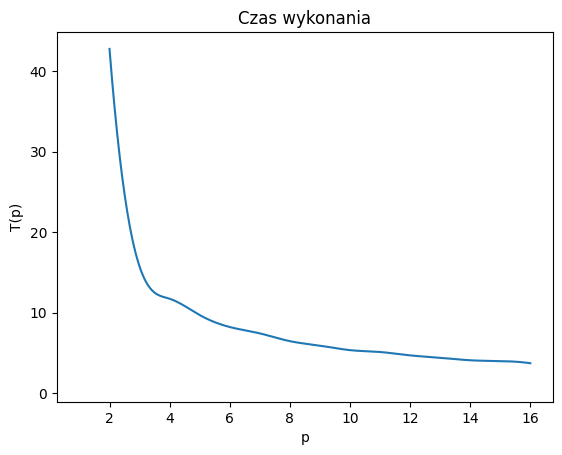

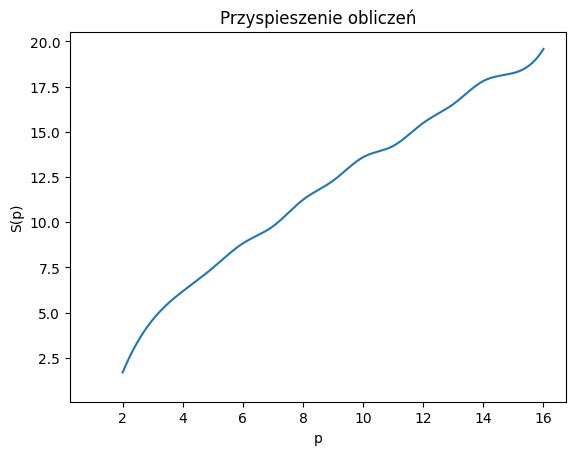

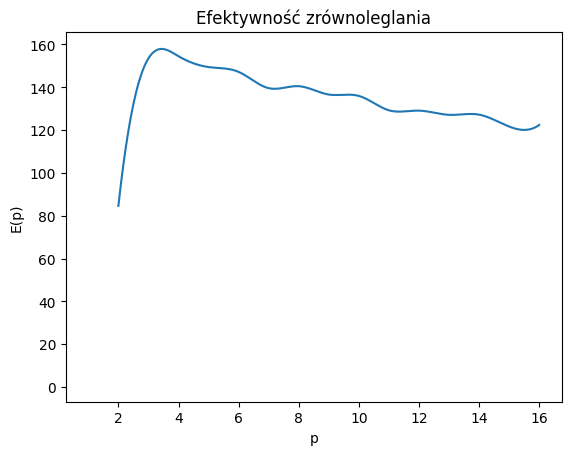

In [18]:
show_plots("hybrid")